---
# **Exponential Smoothing Model Applied to Bitcoin**

---


In [1]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
import pandas as pd

In [6]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [7]:
#df = pd.read_csv("BTC-USD.csv")
#df.head()

# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
df = pdr.get_data_yahoo('BTC-USD')

In [8]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [9]:
# For Data2 - Transforming the index in a Date columns
df=df.reset_index()

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Date,Close
1821,2022-05-02,38529.328125
1822,2022-05-03,37750.453125
1823,2022-05-04,39698.371094
1824,2022-05-05,36575.140625
1825,2022-05-06,35899.015625


In [11]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1826,35920.954309,983.342759,34660.749857,37181.158761
1827,35920.954309,1370.840491,34164.151531,37677.757086
1828,35920.954309,1670.761600,33779.787165,38062.121453
1829,35920.954309,1924.496036,33454.613400,38387.295217
1830,35920.954309,2148.470541,33167.578524,38674.330094


In [12]:
print(results.forecast(steps=1))

1826    35920.954309
dtype: float64


In [13]:
x = results.forecast(steps=1)
print(x)
if x.item() > 36996.509921:
    print('yes')
else:
    print('No')

1826    35920.954309
dtype: float64
No


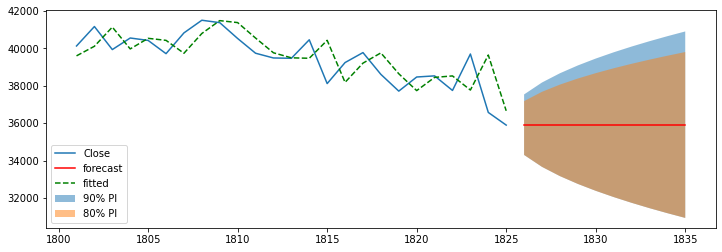

In [14]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

Statistical model

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                   ETS(A, N, N)   Log Likelihood              -15173.871
Date:                Fri, 06 May 2022   AIC                          30353.741
Time:                        21:23:13   BIC                          30370.271
Sample:                             0   HQIC                         30359.839
                               - 1826   Scale                       966962.981
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9713      0.015     66.020      0.000       0.942       1.000
initial_level    1596.7100   2.65e+05      0.006      0.995   -5.18e+05    5.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8620.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.94   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Model residuals

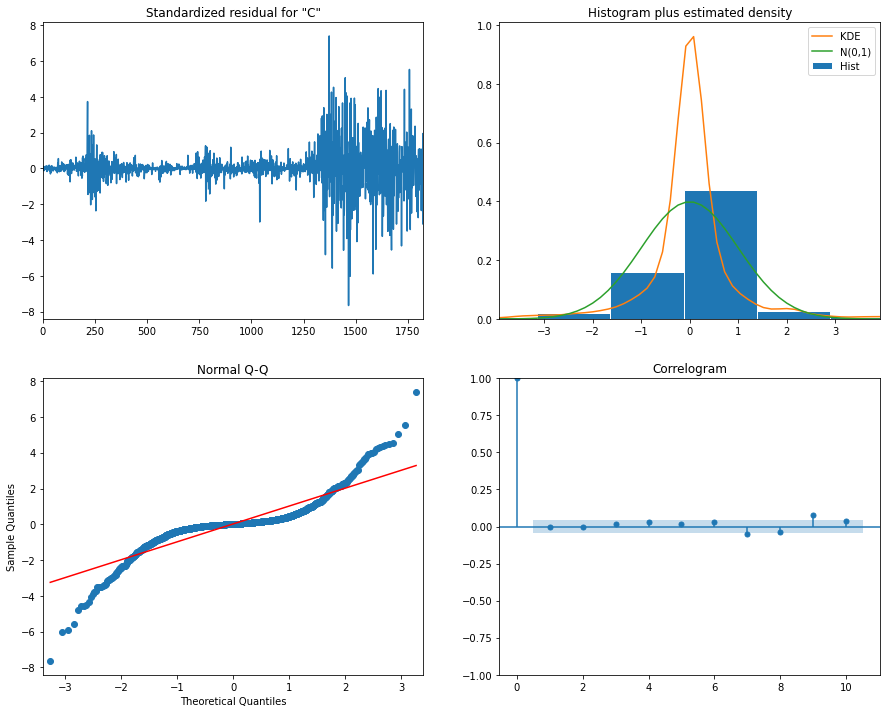

In [17]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [18]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((1552, 2), (274, 2))

In [19]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

1552    40836.054049
1553    42759.645267
1554    44504.236667
1555    43818.388498
1556    46292.282554
            ...     
1821    38448.206335
1822    38526.999277
1823    37772.746247
1824    39643.090168
1825    36663.215460
Name: Simple Exponential Smoothing Predictions, Length: 274, dtype: float64


In [20]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.958022


# Exponential Smoothing Model applied to ETHERIUM

In [21]:
df_eth = pdr.get_data_yahoo('ETH-USD')

In [22]:
df_eth.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [23]:
df_eth=df_eth.reset_index()

In [24]:
df_eth["Date"] = pd.to_datetime(df_eth["Date"])
df.tail()

,Date,Close
1821,2022-05-02,38529.328125
1822,2022-05-03,37750.453125
1823,2022-05-04,39698.371094
1824,2022-05-05,36575.140625
1825,2022-05-06,35899.015625


In [25]:
df_eth.head(10000)

,Date,Close
0,2017-11-09,320.884003
1,2017-11-10,299.252991
2,2017-11-11,314.681000
3,2017-11-12,307.907990
4,2017-11-13,316.716003
...,...,...
1635,2022-05-02,2857.410400
1636,2022-05-03,2783.476318
1637,2022-05-04,2940.644775
1638,2022-05-05,2749.213135


In [26]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [27]:
HORIZON = 10

model_eth = ExponentialSmoothing(endog = df_eth['Close'])
results_eth = model_eth.fit()

preds_eth = results_eth.get_forecast(steps=HORIZON)

preds_eth.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1640,2687.256945,79.545118,2585.315774,2789.198115
1641,2687.256945,108.678360,2547.980023,2826.533866
1642,2687.256945,131.508729,2518.721727,2855.792162
1643,2687.256945,150.924172,2493.839835,2880.674054
1644,2687.256945,168.112063,2471.812667,2902.701222


In [28]:
preds_eth.summary_frame(alpha=0.2).head(10)

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1640,2687.256945,79.545118,2585.315774,2789.198115
1641,2687.256945,108.678360,2547.980023,2826.533866
1642,2687.256945,131.508729,2518.721727,2855.792162
1643,2687.256945,150.924172,2493.839835,2880.674054
1644,2687.256945,168.112063,2471.812667,2902.701222
1645,2687.256945,183.698736,2451.837541,2922.676348
1646,2687.256945,198.062580,2433.429535,2941.084355
1647,2687.256945,211.452940,2416.269099,2958.244791
1648,2687.256945,224.044428,2400.132457,2974.381432
1649,2687.256945,235.964967,2384.855672,2989.658218


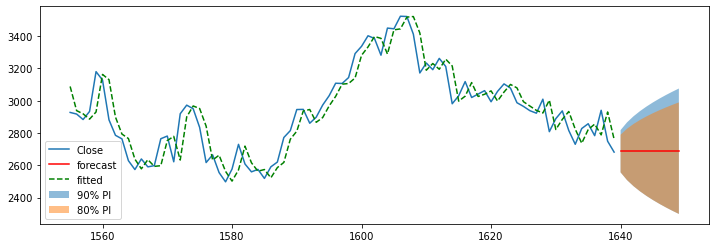

In [29]:
ax_eth = df_eth['Close'].iloc[-85:].plot(figsize=(12,4))
forecast_80_eth = preds_eth.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90_eth = preds_eth.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax_eth.fill_between(forecast_90_eth.index, forecast_90_eth['mean_ci_lower'], forecast_90_eth['mean_ci_upper'], alpha=0.5, label='90% PI')
ax_eth.fill_between(forecast_80_eth.index, forecast_90_eth['mean_ci_lower'], forecast_80_eth['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80_eth['mean'].iloc[-85:].plot(ax=ax_eth, label='forecast', color='red')

results_eth.fittedvalues.iloc[-85:].plot(ax=ax_eth, label='fitted', color='green', linestyle='--')

ax_eth.legend(loc=3)

In [30]:
results_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1640
Model:                   ETS(A, N, N)   Log Likelihood               -9504.231
Date:                Fri, 06 May 2022   AIC                          19014.462
Time:                        21:23:39   BIC                          19030.670
Sample:                             0   HQIC                         19020.473
                               - 1640   Scale                         6327.426
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9309      0.013     72.836      0.000       0.906       0.956
initial_level     320.8837   4205.282      0.076      0.939   -7921.318    8563.085
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24300.66
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              17.06   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Model residuals

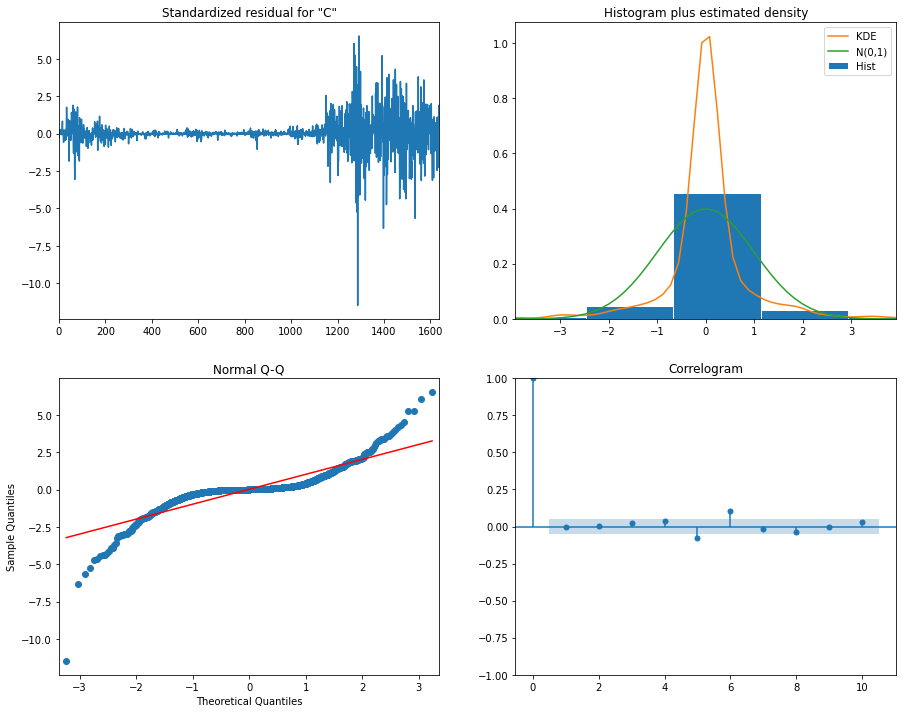

In [32]:
# Diagnosing the model residuals
results_eth.plot_diagnostics(figsize = (15, 12))
plt.show()

In [33]:
# Divide into train and validation set to calculate R-squared score
train_eth = df_eth[:int(0.85 * (len(df_eth)))]
test_eth  = df_eth[int(0.85 * (len(df_eth))):]

train_eth.shape, test_eth.shape

((1394, 2), (246, 2))

In [34]:
start_eth = len(train_eth)
end_eth   = len(train_eth) + len(test_eth) - 1
predictions_eth = results_eth.predict(start = start_eth, end = end_eth, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions_eth)

1394    3792.035524
1395    3930.352615
1396    3890.765451
1397    3947.894948
1398    3929.727303
           ...     
1635    2821.463394
1636    2854.927598
1637    2788.411345
1638    2930.130254
1639    2761.708793
Name: Simple Exponential Smoothing Predictions, Length: 246, dtype: float64


In [35]:
# Create a dataframe to store r2 score
evaluation_results_eth = pd.DataFrame({'r2_score': r2_score(test_eth['Close'], predictions_eth)}, index = [0])

# Display the results
evaluation_results_eth

,r2_score
0,0.952319


# Automation and Decision-Making Function: Custom Made Function to train the model, request external API and come up with an "advice"

The function below will perform the following tasks:
*  Train the model once a day
*  Find the middle value of the dataset
*  HTTP request to find the real time of the crypto
*  According to the position of value-predicted for the following day/real-time value in comparison with the top and bottom section defined in the business case, return an statistical advice.



In [36]:
import requests

In [37]:
from threading import Timer

In [38]:
def find_real_time_value():
    real_time_price = requests.get('https://bitpay.com/api/rates/USD')
    x = real_time_price.json()
    return x['rate']

#find_real_time_value()

In [39]:
def get_middle_value(data):
    high = 0
    low = 0
    middle_value = 0
    
    # Finding higher and lowest values in order to get a middle value
    for x in data:
        if high > x:
            high = high
        else:
            high = x
        
        if low < x:
            low = low
        else:
            low = x
        
        middle_value = (high - low)/2 
            
    return middle_value
    #return data.median()

test = get_middle_value(df['Close'])
print(test)

33783.4140625


In [40]:
def get_highest(data):
    highest = 0
    for x in data:
        if highest > x:
            highest = highest
        else:
            highest = x
            
    return highest

In [41]:
def get_lowest(data):
    lowest = 0
    for x in data:
        if lowest < x:
            lowest = lowest
        else:
            lowest = x
            
    return lowest

In [42]:
# Train the Model
# Function to train a general model every 24h
# Scheduled to get the tests done by Monday 07th May 2022

def model_training(dataset, days_to_predict):
    run = True
    HORIZON = days_to_predict

    model = ExponentialSmoothing(endog = dataset['Close'])
    results = model.fit()

    preds = results.get_forecast(steps=HORIZON)

    preds.summary_frame(alpha=0.2).head()
    
    def call_train():
        model_training(dataset, days_to_predict)
        
    if run:
        Timer(86400, call_train).start()
    
    return preds

In [51]:
def statistical_decision(model, data):
    # Defining boundaries
    high = get_highest(data)
    low = get_lowest(data)
    
    top_bounder = 0
    botton_bounder = 0
    
    run = True
    
    # to be returned
    #buy = 'Buy'
    #sell = 'Sell'
    
    # Checking real time of the bitcoin in USD
    x = find_real_time_value()
    
    # Get Middle value
    m = get_middle_value(data)
    one_third_high = (high - m)/3
    one_third_bottom = (low - m)/3
    top_bounder = m + one_third_high * 2
    bottom_bounder = m + one_third_bottom * 2 
    
    # Decision logic
    v = model.forecast(steps=1)
    #print(v)
    
    to_return_1 = 'Real time value is:'
    to_return_2 = 'Predicted value for tomorrow is:'
    
    if v.item() > top_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
        #return sell
    
    elif v.item() < bottom_bounder:
        print('Sell!', to_return_1, x, to_return_2, v.item())
        #return sell
    
    elif v.item() > bottom_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
        #return buy
    
    elif v.item() < top_bounder:
        print('Buy!', to_return_1, x, to_return_2, v.item())
        #return buy
    def call():
        statistical_decision(model, data)
        
    if run:
        Timer(60, call).start()
        
#statistical_decision(results, df['Close'])
    

In [52]:
statistical_decision(results, df['Close'])

Buy! Real time value is: 35867.68 Predicted value for tomorrow is: 35920.95430873551


In [ ]:
# In order for the following work with the Etherium. It is needed to find an API to return the real value of it.
# Or it is possible to take the real time API call off the function and returns and the statistical decision will still work for any crypto-currencies

#statistical_decision(results_eth, df_eth['Close'])